<a href="https://colab.research.google.com/github/nramelia2/MACHINE-LEARNING/blob/main/WEEK%202_LinearModel/Classification_Recognizing_Hand_Written_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recognizing hand-written digits

In [1]:
# Standard scientific Python import
import matplotlib.pyplot as plt

In [2]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

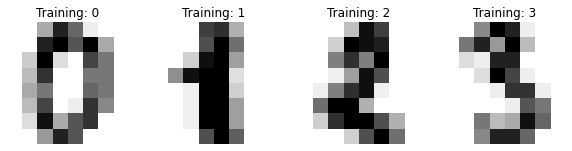

In [3]:
digits = datasets.load_digits()

# show a picture of the box
# axes for pictures, nrows for rows and ncols for columns, figsize is used for image size
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# display target dataset
for ax, image, label in zip(axes, digits.images, digits.target):
  # The ax.set_axis_off() function in axes module of matplotlib library is used to turn the x- and y-axis off and this affects the axis lines, ticks, ticklabels, grid and axis labels.
  ax.set_axis_off()
  # interpolation='nearest' simply displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution (which is most often the case). It will result an image in which pixels are displayed as a square of multiple pixels.
  # cmap for color
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  # title
  ax.set_title("Training: %i" % label)

## Classification

In [4]:
# to return the function in gamma
from math import gamma
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subset
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

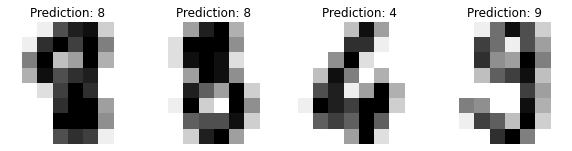

In [5]:
# Below we visualize the first 4 test samples and show their predict digit value in the title.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
  ax.set_axis_off()
  # reshape - to change or create rows and columns
  image = image.reshape(8, 8)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Prediction: {prediction}')

In [6]:
# classification_report builds a text report showing the main classification metrics.
print(
    f'Classification report for classifier {clf}:\n'
    f'{metrics.classification_report(y_test, predicted)}\n'
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


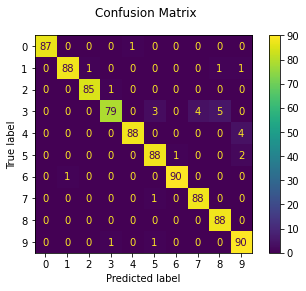

In [7]:
# can also plot a confusion matrix of the true digit values and the predicted digit values.
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# confusion_matrix - performance measurement for machine learning classification problems and the output can be two or more classes.
# confusion_matrix - table with 4 different combinations of predicted value and actual value.
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()